<a href="https://colab.research.google.com/github/codewithsrs/app-data-analysis/blob/main/Copy_of_Self_Project_Linear_Regression_(Car_Dekho).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
#import all libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder

from scipy.stats import boxcox
from scipy.special import inv_boxcox

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler,PolynomialFeatures,MinMaxScaler,MaxAbsScaler)
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Ridge, Lasso

from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_predict

In [41]:
c_details = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Machine learning/guided and self project/car_details.csv")

In [42]:
c_details.shape

(4340, 8)

In [43]:
c_details.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner


In [44]:
def split(column):
  p = column.split(" ")
  if len(p)>=4:
    del p[3:]
    return ' '.join(p)
  else:
    return ' '.join(p)
  

In [45]:
def splits(column):
  p = column.split(" ")
  return p[0]

In [46]:
c_details['Name'] = c_details['name'].apply(split)
c_details['Company'] = c_details['Name'].apply(splits)
c_details.drop('name',axis = 1,inplace = True)
c_details.drop('Name',axis = 1,inplace = True)
c_details.drop('year',axis = 1,inplace = True)

In [47]:
c_details.head(2)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Company
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti


In [48]:
c_details_c = c_details.copy()

In [49]:
c_details_c.head(3)

,selling_price,km_driven,fuel,seller_type,transmission,owner,Company
0,60000,70000,Petrol,Individual,Manual,First Owner,Maruti
1,135000,50000,Petrol,Individual,Manual,First Owner,Maruti
2,600000,100000,Diesel,Individual,Manual,First Owner,Hyundai


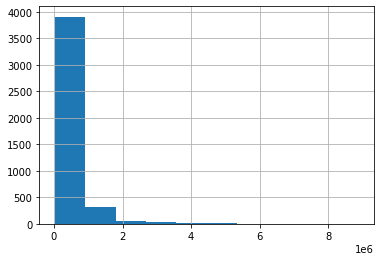

In [50]:
c_details_c['selling_price'].hist()

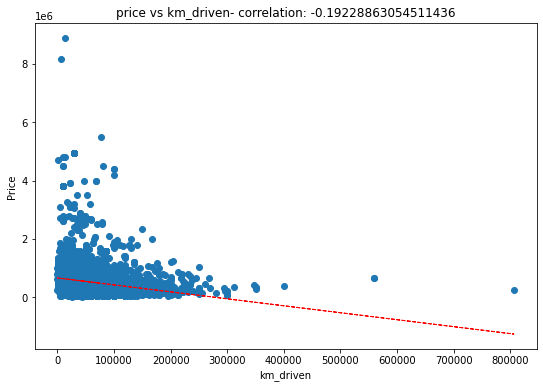

In [51]:
f_cols = c_details.describe().columns
for col in f_cols:
    if col == 'selling_price':
        continue
    else:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        feature = c_details[col]
        label = c_details['selling_price']
        correlation = feature.corr(label)
        plt.scatter(x=feature, y=label)
        plt.xlabel(col)
        plt.ylabel('Price')
        ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
        z = np.polyfit(c_details[col], c_details['selling_price'], 1)
        y_hat = np.poly1d(z)(c_details[col])
        plt.plot(c_details[col], y_hat, "r--", lw=1)

    plt.show()

In [52]:
c_details_c.columns

Index(['selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission',
       'owner', 'Company'],
      dtype='object')

In [53]:
#find all the object columns and one hot encode them
ohc_cols = c_details_c.dtypes == object
ohc_colns = c_details_c.columns[ohc_cols]
le = LabelEncoder()
ohc = OneHotEncoder()
for col in ohc_colns:
    dat = le.fit_transform(c_details_c[col]).astype(int)
    c_details_c = c_details_c.drop(col,axis = 1)
    n_dat = ohc.fit_transform(dat.reshape(-1,1))
    n_cols = n_dat.shape[1]
    colname = ['_'.join([col,str(x)]) for x in range(n_cols)]
    new_df  = pd.DataFrame(n_dat.toarray(),index = c_details_c.index , columns = colname)
    c_details_c = pd.concat([c_details_c,new_df],axis = 1)

In [54]:
c_details_c.head(5)

,selling_price,km_driven,fuel_0,fuel_1,fuel_2,fuel_3,fuel_4,seller_type_0,seller_type_1,seller_type_2,transmission_0,transmission_1,owner_0,owner_1,owner_2,owner_3,owner_4,Company_0,Company_1,Company_2,Company_3,Company_4,Company_5,Company_6,Company_7,Company_8,Company_9,Company_10,Company_11,Company_12,Company_13,Company_14,Company_15,Company_16,Company_17,Company_18,Company_19,Company_20,Company_21,Company_22,Company_23,Company_24,Company_25,Company_26,Company_27,Company_28
0,60000,70000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,135000,50000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,600000,100000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,250000,46000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,450000,141000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**lets use boxcox transformation and see the distribution**

In [55]:
y_col = 'selling_price'
x_data = c_details_c.drop(y_col,axis = 1)
y_data = boxcox(c_details_c[y_col])[0]
lambda1 = boxcox(c_details_c[y_col])[1]

(array([   6.,   79.,  350.,  650., 1197., 1289.,  565.,  116.,   71.,
          17.]),
 array([ 8.90833237,  9.36859741,  9.82886245, 10.28912749, 10.74939252,
        11.20965756, 11.6699226 , 12.13018763, 12.59045267, 13.05071771,
        13.51098275]),
 <a list of 10 Patch objects>)

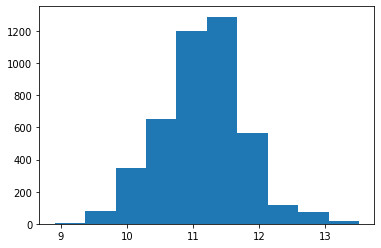

In [56]:
plt.hist(y_data)

**Lets do standard linear regression using standard and minmax scaler with polynomial features**

In [57]:
m = MinMaxScaler()
pf = PolynomialFeatures(degree=3)
lr = LinearRegression()
estimator = Pipeline([("scaler", m),
                      ("poly",pf),
                      ("regression", lr)])
kf = KFold(shuffle=True, random_state=42, n_splits=2)
predictions = cross_val_predict(estimator, x_data, y_data, cv=kf)
r2_score(y_data, predictions)

-1.0243270341327327e+23

In [58]:
s = StandardScaler()
pf = PolynomialFeatures(degree=3)
lr = LinearRegression()
estimator = Pipeline([("scaler", s),
                      ("poly",pf),
                      ("regression", lr)])
kf = KFold(shuffle=True, random_state=42, n_splits=2)
predictions = cross_val_predict(estimator, x_data, y_data, cv=kf)
r2_score(y_data, predictions)

-1.2676694129369248e+25

**so we can see our model performing very bad in standard linear regression**

**Lets try regularization using l2 regularization and see if our model performance can improve and we will use ridge regression and minmax scaler with polynomial features** 

In [59]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", MinMaxScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(3, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [60]:
grid.fit(x_data, y_data)

GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 3.        ,  3.20281535,  3.41934205,  3.65050707,  3.89730002,
        4.16077744,  4.44206728,  4.74237375,  5.06298248,  5.405266  ,
        5.77068963,  6.16081777,  6.57732057,  7.02198109,  7.49670294,
        8.00351841,  8.5445972 ,  9.12225569,  9.73896684, 10.39737082,
       11.10028628, 11.85072242, 12.65189188, 13.5072245 , 14.42038198,
       15.39527357, 16.43607283, 17.54723544, 18.73351832, 20.        ])})

In [61]:
grid.best_score_, grid.best_params_

(0.6273735134357372,
 {'polynomial_features__degree': 3, 'ridge_regression__alpha': 3.0})

In [62]:
y_predict = grid.predict(x_data)

In [63]:
r2_score(y_data, y_predict)

0.6769614470375647

**Lets do the ridge regression with standard scaler using gridsearchcv and see the performance**

In [64]:
from sklearn.model_selection import GridSearchCV

# Same estimator as before
estimator = Pipeline([("scaler", StandardScaler()),
        ("polynomial_features", PolynomialFeatures()),
        ("ridge_regression", Ridge())])

params = {
    'polynomial_features__degree': [1, 2, 3],
    'ridge_regression__alpha': np.geomspace(4, 20, 30)
}

grid = GridSearchCV(estimator, params, cv=kf)

In [65]:
grid.fit(x_data, y_data)

GridSearchCV(cv=KFold(n_splits=2, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('polynomial_features',
                                        PolynomialFeatures()),
                                       ('ridge_regression', Ridge())]),
             param_grid={'polynomial_features__degree': [1, 2, 3],
                         'ridge_regression__alpha': array([ 4.        ,  4.22826702,  4.46956049,  4.7246238 ,  4.99424274,
        5.27924796,  5.58051751,  5.89897953,  6.23561514,  6.59146146,
        6.96761476,  7.36523392,  7.78554391,  8.22983963,  8.69948987,
        9.19594151,  9.72072404, 10.27545421, 10.86184103, 11.48169104,
       12.13691388, 12.82952815, 13.56166768, 14.33558803, 15.15367351,
       16.01844446, 16.93256509, 17.89885162, 18.92028098, 20.        ])})

In [66]:
grid.best_score_, grid.best_params_

(0.6243817804424898,
 {'polynomial_features__degree': 2,
  'ridge_regression__alpha': 20.000000000000004})

In [67]:
y_predict = grid.predict(x_data)

In [68]:
r2_score(y_data, y_predict)

0.669696891843482

**Regularization using gridsearch cv definitely working better in terms of prediction than the standard linearregression model**